# Table of Contents
### 01. Import Libraries and Dataframe
### 02. The Elbow Technique
### 03. K-means clustering
### 04. Export Dataset

# 01. Import Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Project Pathway
path= r'/Users/alexmendrin/Documents/Career Foundry/Data Immersion/Achievement 6/Project Folder'

In [4]:
# import dataframe
vc= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'vehicle_collisions_cleaned.pkl'))

In [5]:
vc.shape

(927852, 19)

In [6]:
vc.head()

,date,time,borough,latitude,longitude,location,num_persons_injured,num_persons_killed,num_pedestrians_injured,num_pedestrians_killed,num_cyclist_injured,num_cyclist_killed,num_motorist_injured,num_motorist_killed,collision_id,contrib_factor_vehicle_1,contrib_factor_vehicle_2,vehicle_type_1,vehicle_type_2
0,9/11/21,9:35,BROOKLYN,40.67,-73.87,"(40.667202, -73.8665)",0,0,0,0,0,0,0,0,4456314,7.0,7.0,2.0,9.0
1,12/14/21,8:13,BROOKLYN,40.68,-73.92,"(40.683304, -73.917274)",0,0,0,0,0,0,0,0,4486609,7.0,7.0,9.0,9.0
2,12/14/21,17:05,NaN,40.71,-73.96,"(40.709183, -73.956825)",0,0,0,0,0,0,0,0,4486555,2.0,7.0,3.0,6.0
3,12/14/21,8:17,BRONX,40.87,-73.83,"(40.86816, -73.83148)",2,0,0,0,0,0,2,0,4486660,7.0,7.0,3.0,3.0
4,12/14/21,21:10,BROOKLYN,40.67,-73.90,"(40.67172, -73.8971)",0,0,0,0,0,0,0,0,4487074,2.0,7.0,3.0,9.0


In [7]:
# Fix borough value format
vc['borough']=vc['borough'].str.title()
vc.head()

,date,time,borough,latitude,longitude,location,num_persons_injured,num_persons_killed,num_pedestrians_injured,num_pedestrians_killed,num_cyclist_injured,num_cyclist_killed,num_motorist_injured,num_motorist_killed,collision_id,contrib_factor_vehicle_1,contrib_factor_vehicle_2,vehicle_type_1,vehicle_type_2
0,9/11/21,9:35,Brooklyn,40.67,-73.87,"(40.667202, -73.8665)",0,0,0,0,0,0,0,0,4456314,7.0,7.0,2.0,9.0
1,12/14/21,8:13,Brooklyn,40.68,-73.92,"(40.683304, -73.917274)",0,0,0,0,0,0,0,0,4486609,7.0,7.0,9.0,9.0
2,12/14/21,17:05,NaN,40.71,-73.96,"(40.709183, -73.956825)",0,0,0,0,0,0,0,0,4486555,2.0,7.0,3.0,6.0
3,12/14/21,8:17,Bronx,40.87,-73.83,"(40.86816, -73.83148)",2,0,0,0,0,0,2,0,4486660,7.0,7.0,3.0,3.0
4,12/14/21,21:10,Brooklyn,40.67,-73.90,"(40.67172, -73.8971)",0,0,0,0,0,0,0,0,4487074,2.0,7.0,3.0,9.0


In [8]:
# Remove categoricl variables
vc= vc.drop(columns=['date', 'time', 'borough', 'latitude', 'longitude', 'location', 'collision_id', 'contrib_factor_vehicle_1', 'contrib_factor_vehicle_2', 'vehicle_type_1', 'vehicle_type_2'])

# 02. The Elbow Technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

#### Whole dataset

In [11]:
score1 = [kmeans[i].fit(vc).score(vc) for i in range(len(kmeans))] 
# Creates a score that represents a rate of variation for the given cluster option.

score1

[-941773.914294076,
 -423324.54076205427,
 -223111.43068422403,
 -144421.4819951845,
 -99260.4914414136,
 -56678.56113948529,
 -36728.38234336453,
 -27692.589685962,
 -22116.13807402123]

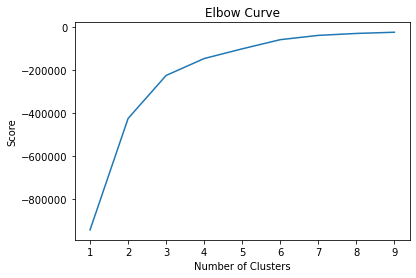

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score1)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal count for clusters is seven, as this is where the elbow curve begins to straighten out¶

#### Scale the data

In [13]:
scaler = StandardScaler()

In [14]:
columns= ['num_persons_injured', 'num_persons_killed', 'num_pedestrians_injured', 'num_pedestrians_killed', 'num_cyclist_injured', 'num_cyclist_killed', 'num_motorist_injured', 'num_motorist_killed']

In [15]:
# scale the data
vc_scaled = pd.DataFrame(scaler.fit_transform(vc), columns=columns)
vc_scaled.head()

,num_persons_injured,num_persons_killed,num_pedestrians_injured,num_pedestrians_killed,num_cyclist_injured,num_cyclist_killed,num_motorist_injured,num_motorist_killed
0,-0.459428,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,-0.350553,-0.022728
1,-0.459428,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,-0.350553,-0.022728
2,-0.459428,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,-0.350553,-0.022728
3,2.403969,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,2.680762,-0.022728
4,-0.459428,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,-0.350553,-0.022728


In [16]:
score = [kmeans[i].fit(vc_scaled).score(vc_scaled) for i in range(len(kmeans))] 
# Creates a score that represents a rate of variation for the given cluster option.

score

[-7422815.999975884,
 -6086131.2275934,
 -4952002.893094987,
 -3787872.427844989,
 -2827954.213637462,
 -1858386.6159744738,
 -909051.7899279635,
 -547064.7400314618,
 -432741.2787593712]

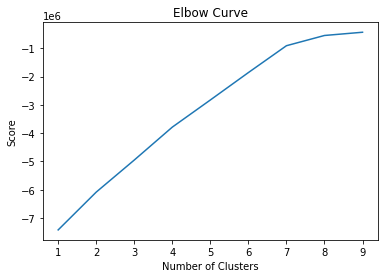

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal count for clusters is seven, as this is where the elbow curve begins to straighten out

# 03. K-means Clustering

#### K-mean on complete dataset

In [18]:
# Create the k-means object.

kmeans1 = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.

kmeans1.fit(vc)

KMeans(n_clusters=3)

In [20]:
vc['clusters'] = kmeans1.fit_predict(vc)

In [21]:
vc.head()

,num_persons_injured,num_persons_killed,num_pedestrians_injured,num_pedestrians_killed,num_cyclist_injured,num_cyclist_killed,num_motorist_injured,num_motorist_killed,clusters
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,2,0,1
4,0,0,0,0,0,0,0,0,0


In [22]:
vc['clusters'].value_counts()

0    783168
2     98886
1     45798
Name: clusters, dtype: int64

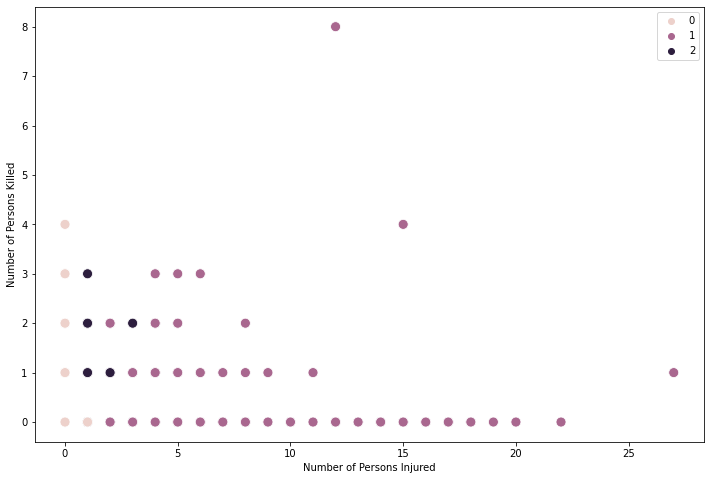

In [24]:
# Plot the clusters for the "num_persons_injured" and "num_persons_killed" variables.

plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=vc['num_persons_injured'], y=vc['num_persons_killed'], hue=kmeans1.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax1.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Persons Injured') # Label x-axis.
plt.ylabel('Number of Persons Killed') # Label y-axis.
plt.show()

#### Overall, it does not seem like there is a direct correlation between the number of persons killed and injured in an incident. The largest group (dark purple) shows when more than 3 people are injured in an accident that a majority of the time there are still no fatalities. The light pink group indicates that even when no people are injured in an accident, there may still be people killed.


In [25]:
vc.loc[vc['clusters'] == 0, 'cluster'] = 'light pink'
vc.loc[vc['clusters'] == 1, 'cluster'] = 'purple'
vc.loc[vc['clusters'] == 2, 'cluster'] = 'dark purple'

In [26]:
vc.groupby('cluster').agg({'num_persons_injured':['mean','median'],
                           'num_persons_killed':['mean','median'],
                           'num_pedestrians_injured':['mean','median'],
                           'num_pedestrians_killed':['mean','median'],
                           'num_cyclist_injured':['mean', 'median'],
                           'num_cyclist_killed': ['mean', 'median'],
                           'num_motorist_injured':['mean', 'median'],
                           'num_motorist_killed': ['mean', 'median']})

num_persons_injured        num_persons_killed         \
                           mean median               mean median   
cluster                                                            
dark purple            1.033544    1.0           0.001800    0.0   
light pink             0.097918    0.0           0.001308    0.0   
purple                 2.595222    2.0           0.003384    0.0   

            num_pedestrians_injured        num_pedestrians_killed         \
                               mean median                   mean median   
cluster                                                                    
dark purple                0.042514    0.0               0.000536    0.0   
light pink                 0.060359    0.0               0.000729    0.0   
purple                     0.014542    0.0               0.000699    0.0   

            num_cyclist_injured        num_cyclist_killed         \
                           mean median               mean median   
cluster                                                            
dark purple            0.011063    0.0           0.000051    0.0   
light pink             0.033404    0.0           0.000137    0.0   
purple                 0.001288    0.0           0.000066    0.0   

            num_motorist_injured        num_motorist_killed         
                            mean median                mean median  
cluster                                                             
dark purple             0.975699    1.0            0.001224    0.0  
light pink              0.000043    0.0            0.000412    0.0  
purple                  2.578366    2.0            0.002620    0.0

#### Overall, these statistics reiterate the point that was made above, showing that in the purple group where the average number of persons injured in an accident is 3, there are 0 people killed in an accident. The same can be said for the other clusters, indicating that no matter how many people are injured in an accident, it does not increase the likeliness that there will be a fatality.

#### K-means on scaled dataset

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [28]:
# Fit the k-means object to the data.

kmeans.fit(vc_scaled)

KMeans(n_clusters=5)

In [29]:
vc_scaled['clusters'] = kmeans.fit_predict(vc_scaled)

In [30]:
vc_scaled.head()

,num_persons_injured,num_persons_killed,num_pedestrians_injured,num_pedestrians_killed,num_cyclist_injured,num_cyclist_killed,num_motorist_injured,num_motorist_killed,clusters
0,-0.459428,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,-0.350553,-0.022728,0
1,-0.459428,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,-0.350553,-0.022728,0
2,-0.459428,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,-0.350553,-0.022728,0
3,2.403969,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,2.680762,-0.022728,1
4,-0.459428,-0.035957,-0.230856,-0.025786,-0.171884,-0.011038,-0.350553,-0.022728,0


In [31]:
vc_scaled['clusters'].value_counts()

0    757646
1    142078
3     26962
2       643
4       523
Name: clusters, dtype: int64

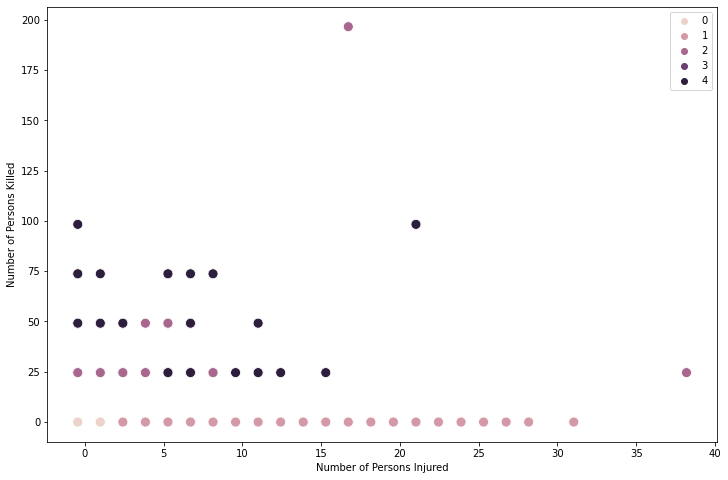

In [32]:
# Plot the clusters for the "num_persons_injured" and "num_persons_killed" variables.

plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=vc_scaled['num_persons_injured'], y=vc_scaled['num_persons_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax2.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Persons Injured') # Label x-axis.
plt.ylabel('Number of Persons Killed') # Label y-axis.
plt.show()

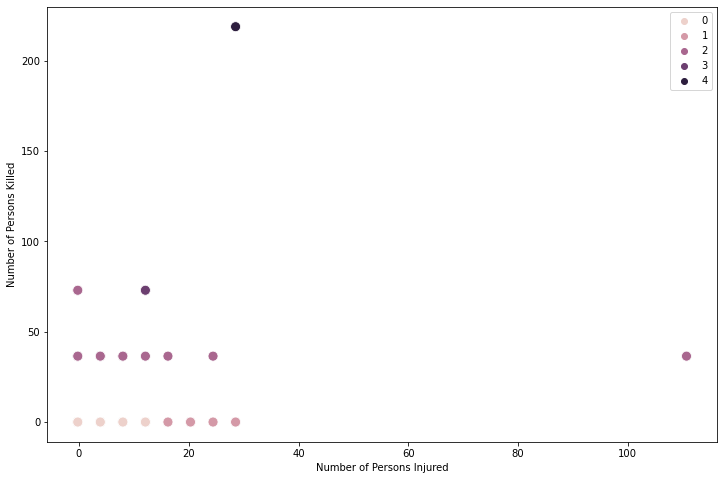

In [39]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=vc_scaled['num_pedestrians_injured'], y=vc_scaled['num_pedestrians_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Persons Injured') # Label x-axis.
plt.ylabel('Number of Persons Killed') # Label y-axis.
plt.show()

In [33]:
vc_scaled.loc[vc['clusters'] == 0, 'cluster'] = 'light pink'
vc_scaled.loc[vc['clusters'] == 1, 'cluster'] = 'pink'
vc_scaled.loc[vc['clusters'] == 2, 'cluster'] = 'light purple'
vc_scaled.loc[vc['clusters'] == 3, 'cluster'] = 'purple'
vc_scaled.loc[vc['clusters'] == 4, 'cluster'] = 'dark purple'

In [34]:
vc_scaled.groupby('cluster').agg({'num_persons_injured':['mean','median'],
                           'num_persons_killed':['mean','median'],
                           'num_pedestrians_injured':['mean','median'],
                           'num_pedestrians_killed':['mean','median'],
                           'num_cyclist_injured':['mean', 'median'],
                           'num_cyclist_killed': ['mean', 'median'],
                           'num_motorist_injured':['mean', 'median'],
                           'num_motorist_killed': ['mean', 'median']})

num_persons_injured           num_persons_killed            \
                            mean    median               mean    median   
cluster                                                                   
light pink             -0.319239 -0.459428          -0.003811 -0.035957   
light purple            1.020295  0.972271           0.008299 -0.035957   
pink                    3.256149  2.403969           0.047252 -0.035957   

             num_pedestrians_injured           num_pedestrians_killed  \
                                mean    median                   mean   
cluster                                                                 
light pink                  0.017103 -0.230856               0.000805   
light purple               -0.056206 -0.230856              -0.006238   
pink                       -0.171116 -0.230856              -0.000302   

                       num_cyclist_injured           num_cyclist_killed  \
                median                mean    median               mean   
cluster                                                                   
light pink   -0.025786            0.023158 -0.171884           0.001129   
light purple -0.025786           -0.107287 -0.171884          -0.006535   
pink         -0.025786           -0.164362 -0.171884          -0.005204   

                       num_motorist_injured           num_motorist_killed  \
                median                 mean    median                mean   
cluster                                                                     
light pink   -0.011038            -0.350488 -0.350553           -0.007307   
light purple -0.011038             1.128273  1.165104            0.023024   
pink         -0.011038             3.557367  2.680762            0.075244   

                        
                median  
cluster                 
light pink   -0.022728  
light purple -0.022728  
pink         -0.022728

# 04. Export Dataset

In [ ]:
# export dataset with cluster columns
vc.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'vehicle_collision_clusters.csv'))